<a href="https://colab.research.google.com/github/minig0n/PSI3471/blob/main/ex_aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para abrir o notebook no Google Colab, altere o domínio `github.com` para `githubtocolab.com`

# PSI3471 - Aula de Exercícios 03

# Neurônio de Rosenblatt no modo mini-batch

Neste exercício vamos utilizar o neurônio de Rosenblatt para implementar funções lógicas AND, OR e XOR.

Iniciamos importando as bibliotecas necessárias para implementar o neurônio de Rosenblatt.

In [176]:
import numpy as np
import matplotlib.pyplot as plt

Vamos gerar os dados de treinamento do problema começando pelo AND.

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [177]:
Nt = 100  # número de pontos de treinamento

#############
# x deve ser uma matriz com Nt linhas e 2 colunas com valores 0 ou 1 aleatórios,
# que pode ser gerada usando as funções np.round e np.random.uniform.
# d deve ser um vetor coluna com Nt linhas contendo o resultado da função lógica
# AND aplicada ao vetor x. Para isso use a função np.logical_and.
# Note que a função np.logical_and devolve um vetor com elementos do tipo boolean.
# Para transformar os elementos para o tipo inteiro, basta multiplicá-lo por 1
# ou usar o método .astype(int)

# Gerar matriz x com valores aleatórios de 0 ou 1
x = np.round(np.random.uniform(0, 1, (Nt, 2))).astype(int)

# Calcular vetor coluna d usando a função lógica AND
d = (np.logical_and(x[:, 0], x[:, 1]).astype(int)).reshape(-1, 1)

print(x.shape)
print(d.shape)
#############

(100, 2)
(100, 1)


A função a seguir implementa o neurônio de Rosenblatt no modo mini-batch. Modifique o programa do algoritmo LMS no modo mini-batch do Exercício 2 inserindo a função de ativação.
Para obter 0 ou 1 na saída, deve-se usar a função degrau em vez da função sinal. Para isso, use a função np.heaviside.
Uma outra modificação que deve ser considerada é a inicialização dos pesos e bias, que agora devem ser inicializados com valores aleatórios uniformemente distribuídos no intervalo [-dw, dw].

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [178]:
def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw):
    """
    W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    dw: inicialização dos pesos e bias com distribuição uniforme no invervalo [-dw, dw]
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor,
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """
    #############

    M = x.shape[1]
    Nmb = int(np.floor(Nt / Nb))

    # Pesos e bias com vetor aleatório entre [-dw e dw]
    # W = np.zeros((Ne * Nmb + 1, M + 1))
    W = np.random.uniform(-dw, dw, (Ne * Nmb + 1, M + 1))

    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    # No modo mini-batch, o passo de adaptação é dividido por Nb
    eta = eta / Nb
    m = 0
    for k in range(Ne):
        np.random.shuffle(Xd)
        x = Xd[:, 0 : M + 1]
        d = Xd[:, [M + 1]]
        for l in range(Nmb):
            dmb = d[l * Nb : (l + 1) * Nb]
            xmb = x[l * Nb : (l + 1) * Nb, :]

            # Note que o índice k usado no site inicia em 1

            # Aplicar a função de heaviside com x<0 -> 0 e x>=0 -> 1
            # emb = dmb - xmb @ W[[m], :].transpose()
            emb = dmb - np.heaviside(xmb @ W[[m], :].transpose(), 1)

            W[[m + 1], :] = W[[m], :] + (eta * xmb.transpose() @ emb).transpose()
            m = m + 1

    #############

    return W

In [179]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 100
dw = 2
W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

#############  Complete o código a seguir
# Wfinal deve ser os valores de pesos e bias da última iteração
Wfinal = W[-1]
#############

print(Wfinal)

[-0.33042068  0.28987702  0.28603399]


<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

5


Text(0.5, 1.0, 'Pesos do LMS no modo mini-batch para a lógica AND')

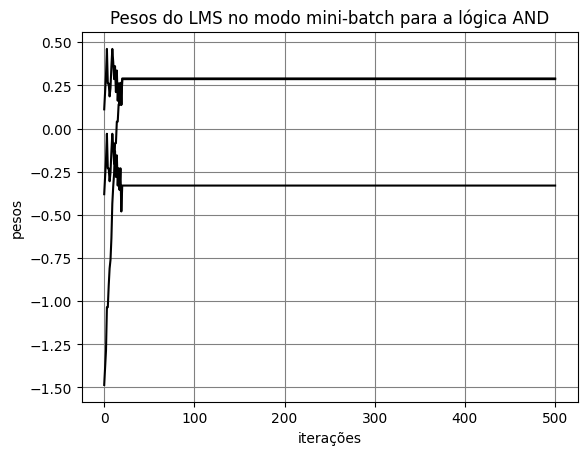

In [180]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações

# Mostra os pesos ao longo do treinamento
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="LMS")

plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos do LMS no modo mini-batch para a lógica AND"
)

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

Taxa de erro: 0.0 %


Text(0.5, 1.0, 'Reta de separação e pontos de teste para a lógica AND')

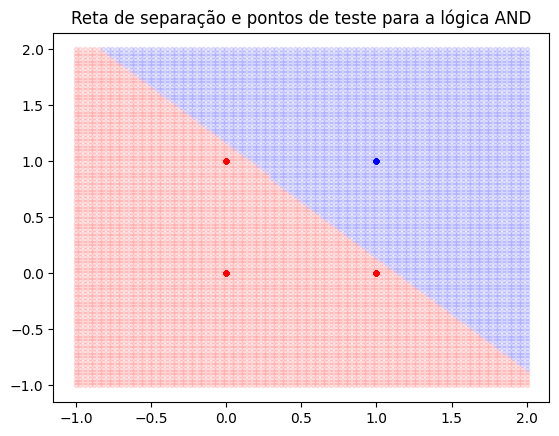

In [181]:
# Gere os dados de teste, calcule a taxa de erro e gere a reta de separação das
# regiões, mostrando em um mesmo gráfico a reta e os dados de teste classificados.
# Comente o resultado, explicando se é possível utilizar o neurônio de Rosenblatt
# para implementar esta função lógica.

Nteste = 100  # número de pontos de teste

#############

# Dados de teste
x_teste = np.round(np.random.uniform(0, 1, (Nteste, 2))).astype(int)

# Vetor de resposta dos dados de teste
d_teste = (np.logical_and(x_teste[:, 0], x_teste[:, 1]).astype(int)).reshape(-1, 1)

# Cálculo da taxa de erro
erro_total = 0
for i in range(x_teste.shape[0]):

  d = np.heaviside((Wfinal[0] + Wfinal[1:] @ x_teste[i]), 1)
  erro = abs(d - d_teste[i][0])
  erro_total += erro

print(f"Taxa de erro: {erro_total/Nteste * 100} %")

# Reta de separação das regiões (reta e dados de teste classificados)
# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-1, 2, Nsep).reshape(-1, 1)
x2S = np.linspace(-1, 2, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.heaviside((xgrid @ Wfinal), 1).reshape(-1, 1)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for j in range(Nteste):
    if d_teste[j][0] == 1:
        ax2.plot(x_teste[j, 0], x_teste[j, 1], ".b")
    else:
        ax2.plot(x_teste[j, 0], x_teste[j, 1], ".r")

# Plota pontos da grade com saída 0 (usa transparência alpha)
l0 = np.where(ygrid == 0)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)

plt.title(
    "Reta de separação e pontos de teste para a lógica AND"
)



Pelo gráfico é possível observar a clara separação entre as regiões de saída 0 (em vermelho) e 1 (em azul). Portanto, o neurônio de Rosenblatt pode ser utilizado para implementar a função lógica AND.

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [182]:
# Repita o exercício para o OR e o XOR.

In [183]:
Nt = 100  # número de pontos de treinamento

# Gerar matriz x com valores aleatórios de 0 ou 1
x = np.round(np.random.uniform(0, 1, (Nt, 2))).astype(int)

# Calcular vetor coluna d usando a função lógica OR
d = (np.logical_or(x[:, 0], x[:, 1]).astype(int)).reshape(-1, 1)

print(x.shape)
print(d.shape)

(100, 2)
(100, 1)


In [184]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 100
dw = 2
W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

#############  Complete o código a seguir
# Wfinal deve ser os valores de pesos e bias da última iteração
Wfinal = W[-1]
#############

print(Wfinal)

[-0.1243826   0.1992903   1.16422217]


5


Text(0.5, 1.0, 'Pesos do LMS no modo mini-batch para lógica OR')

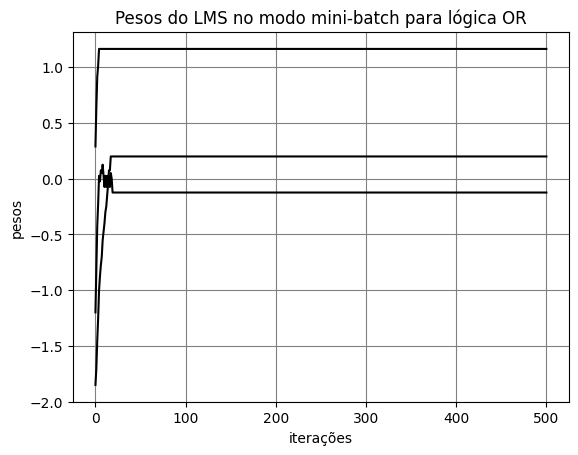

In [185]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações

# Mostra os pesos ao longo do treinamento
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="LMS")

plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos do LMS no modo mini-batch para lógica OR"
)

Taxa de erro: 0.0 %


Text(0.5, 1.0, 'Reta de separação e pontos de teste para a lógica OR')

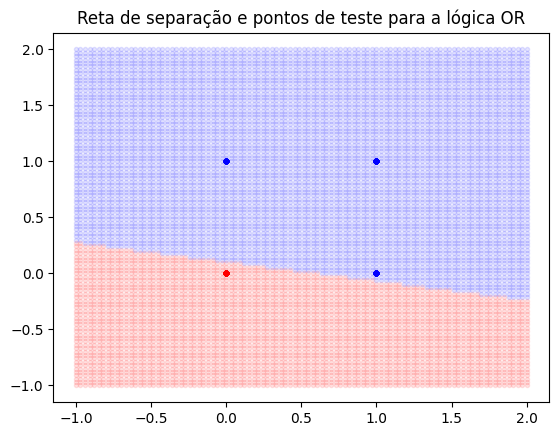

In [186]:
# Gere os dados de teste, calcule a taxa de erro e gere a reta de separação das
# regiões, mostrando em um mesmo gráfico a reta e os dados de teste classificados.
# Comente o resultado, explicando se é possível utilizar o neurônio de Rosenblatt
# para implementar esta função lógica.

Nteste = 100  # número de pontos de teste

#############

# Dados de teste
x_teste = np.round(np.random.uniform(0, 1, (Nteste, 2))).astype(int)

# Vetor de resposta dos dados de teste
d_teste = (np.logical_or(x_teste[:, 0], x_teste[:, 1]).astype(int)).reshape(-1, 1)

# Cálculo da taxa de erro
erro_total = 0
for i in range(x_teste.shape[0]):

  d = np.heaviside((Wfinal[0] + Wfinal[1:] @ x_teste[i]), 1)
  erro = abs(d - d_teste[i][0])
  erro_total += erro

print(f"Taxa de erro: {erro_total/Nteste * 100} %")

# Reta de separação das regiões (reta e dados de teste classificados)
# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-1, 2, Nsep).reshape(-1, 1)
x2S = np.linspace(-1, 2, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.heaviside((xgrid @ Wfinal), 1).reshape(-1, 1)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for j in range(Nteste):
    if d_teste[j][0] == 1:
        ax2.plot(x_teste[j, 0], x_teste[j, 1], ".b")
    else:
        ax2.plot(x_teste[j, 0], x_teste[j, 1], ".r")

# Plota pontos da grade com saída 0 (usa transparência alpha)
l0 = np.where(ygrid == 0)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)

plt.title(
    "Reta de separação e pontos de teste para a lógica OR"
)

Pelo gráfico é possível observar a clara separação entre as regiões de saída 0 (em vermelho) e 1 (em azul). Portanto, o neurônio de Rosenblatt pode ser utilizado para implementar a função lógica OR.

In [187]:
Nt = 100  # número de pontos de treinamento

# Gerar matriz x com valores aleatórios de 0 ou 1
x = np.round(np.random.uniform(0, 1, (Nt, 2))).astype(int)

# Calcular vetor coluna d usando a função lógica XOR
d = (np.logical_xor(x[:, 0], x[:, 1]).astype(int)).reshape(-1, 1)

print(x.shape)
print(d.shape)

(100, 2)
(100, 1)


In [188]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 100
dw = 2
W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

#############  Complete o código a seguir
# Wfinal deve ser os valores de pesos e bias da última iteração
Wfinal = W[-1]
#############

print(Wfinal)

[0.12006421 0.02974833 0.13854259]


5


Text(0.5, 1.0, 'Pesos do LMS no modo mini-batch para lógica XOR')

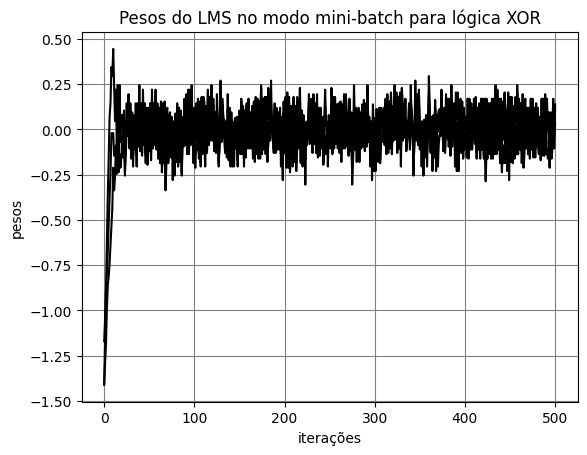

In [189]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações

# Mostra os pesos ao longo do treinamento
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="LMS")

plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos do LMS no modo mini-batch para lógica XOR"
)

Taxa de erro: 56.99999999999999 %


Text(0.5, 1.0, 'Reta de separação e pontos de teste para a lógica XOR')

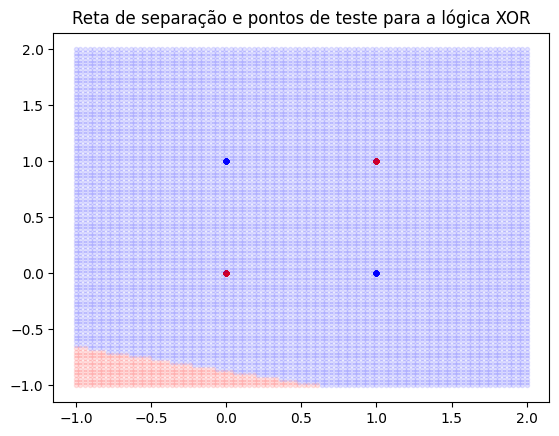

In [191]:
# Gere os dados de teste, calcule a taxa de erro e gere a reta de separação das
# regiões, mostrando em um mesmo gráfico a reta e os dados de teste classificados.
# Comente o resultado, explicando se é possível utilizar o neurônio de Rosenblatt
# para implementar esta função lógica.

Nteste = 100  # número de pontos de teste

#############

# Dados de teste
x_teste = np.round(np.random.uniform(0, 1, (Nteste, 2))).astype(int)

# Vetor de resposta dos dados de teste
d_teste = (np.logical_xor(x_teste[:, 0], x_teste[:, 1]).astype(int)).reshape(-1, 1)

# Cálculo da taxa de erro
erro_total = 0
for i in range(x_teste.shape[0]):

  d = np.heaviside((Wfinal[0] + Wfinal[1:] @ x_teste[i]), 1)
  erro = abs(d - d_teste[i][0])
  erro_total += erro

print(f"Taxa de erro: {erro_total/Nteste * 100} %")

# Reta de separação das regiões (reta e dados de teste classificados)
# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-1, 2, Nsep).reshape(-1, 1)
x2S = np.linspace(-1, 2, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.heaviside((xgrid @ Wfinal), 1).reshape(-1, 1)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for j in range(Nteste):
    if d_teste[j][0] == 1:
        ax2.plot(x_teste[j, 0], x_teste[j, 1], ".b")
    else:
        ax2.plot(x_teste[j, 0], x_teste[j, 1], ".r")

# Plota pontos da grade com saída 0 (usa transparência alpha)
l0 = np.where(ygrid == 0)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)

plt.title(
    "Reta de separação e pontos de teste para a lógica XOR"
)

Pelos gráficos, é possível observar que o algoritmo não converge para uma solução e que a reta de separação é incapaz de dividir corretamente as regiões de saída 0 (em vermelho) e 1 (em azul). Assim, o neurônio de Rosenblatt apresenta uma taxa de erro muito elevada e é inadequado para implementar a função lógica XOR.
